In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cmath
import os
from google.colab.patches import cv2_imshow
from skimage.color import rgb2gray, gray2rgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Manipulation 1**

**1- Creation des Matrices I1, I2, I3:**

In [ ]:
A = np.arange(0,256,4)
B= np.array([0,0,0,0,0,0,0,0])
C = np.array([0,0,1,1,1,1,0,0])

In [ ]:
I1 = np.tile(A,(64,1))
print(I1)

[[  0   4   8 ... 244 248 252]
 [  0   4   8 ... 244 248 252]
 [  0   4   8 ... 244 248 252]
 ...
 [  0   4   8 ... 244 248 252]
 [  0   4   8 ... 244 248 252]
 [  0   4   8 ... 244 248 252]]


In [ ]:
I2= np.array([B,B,C,C,C,C,B,B])
print(I2)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [ ]:
I33 = np.concatenate((I2,I2), axis = 1)
I3 = np.concatenate((I33,I33), axis = 0)
print(I3)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


**2-**

2-1/ Convertion des 3 matrices en unit 8:



In [ ]:
print("Le type de la matrice I1 avant la convertion :" ,I1.dtype)
print("Le type de la matrice I2 avant la convertion :" ,I2.dtype)
print("Le type de la matrice I3 avant la convertion :" ,I3.dtype)

Le type de la matrice I1 avant la convertion : int64
Le type de la matrice I2 avant la convertion : int64
Le type de la matrice I3 avant la convertion : int64


In [ ]:
I1 = np.uint8(I1)
I2 = np.uint8(I2)
I3 = np.uint8(I3)

In [ ]:
print("Le type de la matrice I1 aprés la convertion :" ,I1.dtype)
print("Le type de la matrice I2 aprés la convertion :" ,I2.dtype)
print("Le type de la matrice I3 aprés la convertion :" ,I3.dtype)

Le type de la matrice I1 aprés la convertion : uint8
Le type de la matrice I2 aprés la convertion : uint8
Le type de la matrice I3 aprés la convertion : uint8


**2-2/ La Visualisation**

**2-2/**

Remarque : la fonction *cv.imshow("Image", nom de la matrice)* ne marche pas sur Google_Collab, du coup on s'est limité à la deuxième méthode !

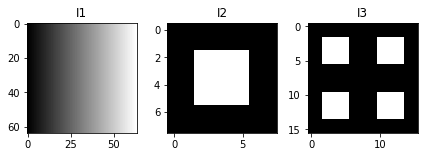

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].set_title("I1")
ax[0].imshow(I1,cmap='gray')

ax[1].set_title("I2")
ax[1].imshow(I2,cmap='gray')

ax[2].set_title("I3")
ax[2].imshow(I3,cmap='gray')

plt.tight_layout()

*Commentaire :*
- Cette méthode n’affiche pas la taille réelle de l’image mais elle les
affiche d’une bonne manière de visualisation.
- L’image L1 est dégradé du blanc au noir, on a pu bien le savoir
avant la visualisation car le vecteur A passe du valeur 0 vers 64 avec
un pas de 4.
-L’image L2 qui est une matrice de 0 centré par un carré de 1, le 0
qui est le noir et le 1 qui est un blanc ce qu’on est entrain de voir sur
l’image.
-L’image L3, de même mais avec 4 carré de 1.

**Manipulation 2**

**1/**

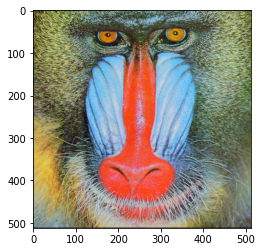

In [ ]:
path = '/content/drive/MyDrive/images/mandrill.png'
image = cv.imread(path)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

**2/**

In [ ]:
print("La taille de l'image:", '\033[92m', image.shape)
print('\033[30m',"La profendeur de l'image:",'\033[91m',image.dtype)

La taille de l'image:  (512, 512, 3)
 La profendeur de l'image:  uint8


**3/**

Les valeurs de l’image sont de type « uint8 » : les valeurs des pixels varient de 0 à 255


**4/**

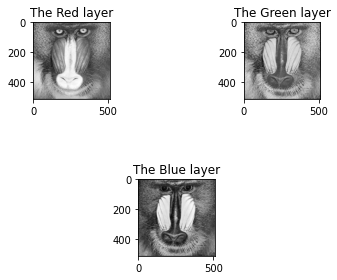

In [ ]:
r,g,b  = cv.split(image)

plot1 = plt.subplot2grid((5,4), (0,0),colspan = 2, rowspan = 2)
plot1.imshow(r, cmap = 'gray')
plot2 = plt.subplot2grid((5,4), (0,2),colspan = 2, rowspan = 2)
plot2.imshow(g, cmap = 'gray')
plot3 = plt.subplot2grid((5,4), (3,1),colspan = 2, rowspan = 2)
plot3.imshow(b, cmap= 'gray')

plot1.set_title('The Red layer')
plot2.set_title('The Green layer')
plot3.set_title('The Blue layer')

plt.tight_layout()


**5/**
On a dans l'image originale les yeux qui sont orange (une
couleur secondaire composée du rouge et du vert) : 
- On visualise dans l’image du canal vert les yeux sont un peu blanc car l’orange est une composition du vert mais pas autant que le rouge.
- On visualise que dans l’image du canal rouge les yeux sont blanc ce qui explique la présence du rouge beaucoup plus.
- On visualise dans l’image du canal bleu les yeux sont noirs ce qui explique l’absence du bleu ( l’orange n’est pas une composition du bleu )


PS : On remarque donc que le blanc est la présence d'une couleur, contrairement au noir !


**6/ les combinaisons des canaux RGB (5)**

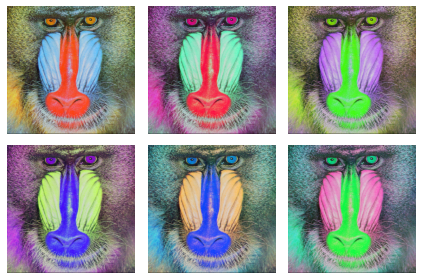

In [ ]:
fig,ax = plt.subplots(nrows = 2, ncols=3)
for k in range(2):
  for j in range(3):
    ax[k,j].axis('off')

ax[0,0].imshow(cv.merge([r,g,b]))
ax[0,1].imshow(cv.merge([r,b,g]))
ax[0,2].imshow(cv.merge([g,r,b]))
ax[1,0].imshow(cv.merge([g,b,r]))
ax[1,1].imshow(cv.merge([b,g,r]))
ax[1,2].imshow(cv.merge([b,r,g]))

plt.tight_layout()

*Commentaire :* 

Lorsqu'on change l'ordre des canaux RGB, les couleurs de l'image changent !

**7/**

In [ ]:
cv.imwrite('/content/drive/MyDrive/images/savedImage.png',r)
cv.imwrite('/content/drive/MyDrive/images/savedImage.bmp',g)
cv.imwrite('/content/drive/MyDrive/images/savedImage.jpeg',b)

True

**8/**

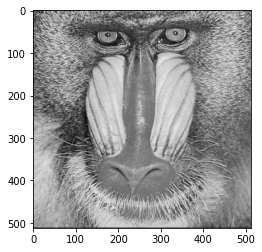

In [ ]:
luminance = 0.2126*r+0.7152*g+0.0722*b
plt.imshow(luminance, cmap = 'gray')

**9/**

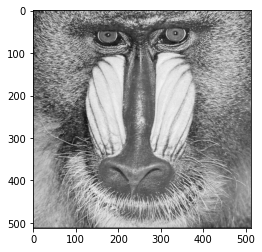

In [ ]:
im9 =cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(im9, cmap = 'gray')

In [ ]:
im9 == luminance

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

non, on n'obtient pas le meme résultat, il y a une petite différence qui peut etre justifiée par les légères **imprécision** et **incertitude** qu'il y'a dans **la formule** de la *Luminance* de *la question 8*.

**Manipulation 3**

**1/**

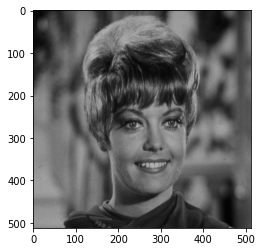

In [ ]:
path = '/content/drive/MyDrive/images/zelda.png'
zelda = cv.imread(path)
plt.imshow(zelda)

In [ ]:
print(zelda.dtype)
print(zelda.shape)

uint8
(512, 512, 3)


In [ ]:
print("la dimension de l'image est : ",zelda.shape)

la dimension de l'image est :  (512, 512, 3)


In [ ]:
poids = 135
print("Le poids de l'image est : ", poids, "Ko")

Le poids de l'image est :  135 Ko


**2/ le sous-échantillonnage de l’image**

In [ ]:
zelda_gray = rgb2gray(zelda)

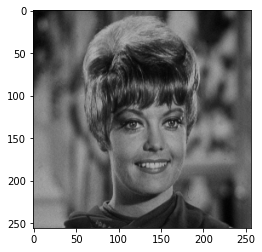

In [ ]:
r,g,b = cv.split(zelda)
r = r[0:512:2, 0:512:2]
g = g[0:512:2, 0:512:2]
b = b[0:512:2, 0:512:2]
zelda_degrade = cv.merge([r,g,b])
plt.imshow(zelda_degrade)

In [ ]:
cv.imwrite('/content/drive/MyDrive/images/zelda_degrade.png',zelda_degrade)

True

Le poids de l'image résultante est inférieur au poids de l'image originale

**3/**

In [ ]:
zelda_gray = rgb2gray(zelda)

In [ ]:
zelda_128 = zelda_gray*128
for i in range(0,512):
  for j in range (0,512):
    zelda_128[i,j] = round(zelda_128[i,j])
  
zelda_64 = zelda_gray*64
for i in range(0,512):
  for j in range (0,512):
    zelda_64[i,j] = round(zelda_64[i,j])

zelda_32 = zelda_gray*32
for i in range(0,512):
  for j in range (0,512):
    zelda_32[i,j] = round(zelda_32[i,j])

zelda_16 = zelda_gray*16
for i in range(0,512):
  for j in range (0,512):
    zelda_16[i,j] = round(zelda_16[i,j])

zelda_8 = zelda_gray*8
for i in range(0,512):
  for j in range (0,512):
    zelda_8[i,j] = round(zelda_8[i,j])

zelda_4 = zelda_gray*4
for i in range(0,512):
  for j in range (0,512):
    zelda_4[i,j] = round(zelda_4[i,j])

zelda_2 = zelda_gray*2
for i in range(0,512):
  for j in range (0,512):
    zelda_2[i,j] = round(zelda_2[i,j])

**4/**

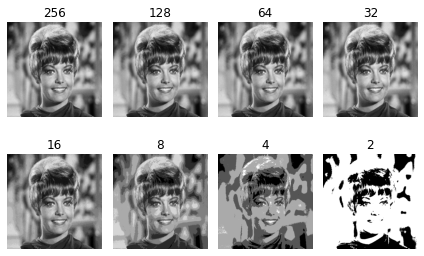

In [ ]:
fig, ax = plt.subplots(2,4)
ax[0,0].imshow(zelda_gray, cmap = 'gray')
ax[0,1].imshow(zelda_128, cmap = 'gray')
ax[0,2].imshow(zelda_64, cmap = 'gray')
ax[0,3].imshow(zelda_32, cmap = 'gray')
ax[1,0].imshow(zelda_16, cmap = 'gray')
ax[1,1].imshow(zelda_8, cmap = 'gray')
ax[1,2].imshow(zelda_4, cmap = 'gray')
ax[1,3].imshow(zelda_2, cmap = 'gray')

for k in range(2):
  for j in range(4):
    ax[k,j].axis('off')

ax[0,0].set_title("256")
ax[0,1].set_title("128")
ax[0,2].set_title("64")
ax[0,3].set_title("32")
ax[1,0].set_title("16")
ax[1,1].set_title("8")
ax[1,2].set_title("4")
ax[1,3].set_title("2")

plt.tight_layout()

le seuil minimal de quantification est 16

**5/**

In [ ]:
cv.imwrite('/content/drive/MyDrive/images/zelda_quantifie.png', zelda_16)

True

le taux de rédcution du poids est : ( poids(zelda_gray) - poids(zelda_16) ) / poids(zelda_gray) = 135-50 / 135 = 63 %


**Manipulation 4**

**1/**

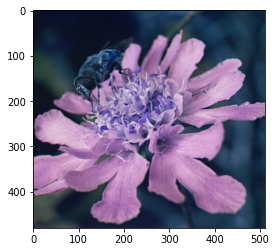

In [ ]:
path = '/content/drive/MyDrive/images/flower.bmp'
flower = cv.imread(path)
plt.imshow(flower)

**2/**

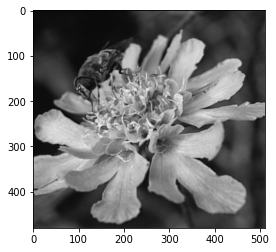

In [ ]:
b,v,r = cv.split(flower)         
y = 0.299*r + 0.587*v + 0.114*b 
y = y.astype(np.uint8)          
plt.imshow(y,cmap='gray')

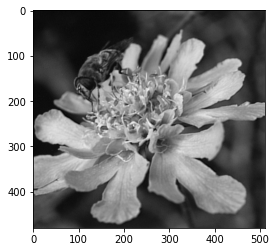

In [ ]:
flower_gray = cv.cvtColor(flower  , cv.COLOR_BGR2GRAY)
plt.imshow(flower_gray, cmap='gray')

**3/**

**3-1/ l'histogramme**

[   0    0    0    0    0    0    0    0    0    0    2    2    3    8
   10   18   61  182  565 1378 2387 3494 3742 3698 2971 2107 1544 1154
 1054 1159 1218 1380 1591 1749 1969 1952 2129 2120 2094 2091 2132 1962
 2040 1913 1928 1810 1800 1967 1935 2073 2063 2122 2131 2213 2199 2362
 2453 2327 2326 2354 2376 2388 2209 2114 1958 1871 1719 1663 1530 1503
 1528 1401 1347 1259 1199 1235 1146 1108  973  954  867  793  712  646
  619  630  567  576  547  549  557  497  494  457  461  451  437  408
  424  439  469  464  495  484  521  518  556  557  587  569  624  672
  679  814  808  791  963  964  936 1002 1122 1184 1210 1144 1090 1151
 1127 1137 1104 1144 1204 1194 1280 1287 1292 1354 1353 1385 1380 1253
 1339 1318 1357 1409 1384 1457 1492 1490 1474 1550 1520 1509 1605 1514
 1537 1599 1625 1547 1587 1507 1459 1550 1568 1592 1535 1477 1383 1469
 1462 1370 1403 1323 1363 1367 1252 1314 1267 1251 1290 1250 1279 1366
 1232 1194 1168 1173 1197 1201 1128  951  956  889  785  841  711  693
  636 

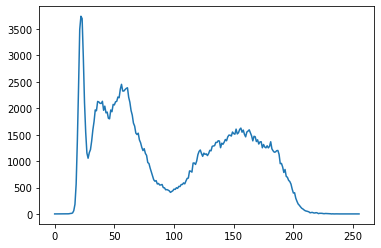

In [ ]:
histo = np.zeros(256, int)      
for i in range(0,flower.shape[0]):       
    for j in range(0,flower.shape[1]):   
        histo[y[i,j]] = histo[y[i,j]] + 1
print(histo)
plt.plot(histo)
plt.show()

(array([2.000e+00, 3.000e+00, 7.000e+00, 7.000e+00, 1.400e+01, 3.800e+01,
        9.400e+01, 3.550e+02, 0.000e+00, 8.740e+02, 1.869e+03, 2.970e+03,
        3.727e+03, 3.810e+03, 3.329e+03, 2.578e+03, 0.000e+00, 1.778e+03,
        1.318e+03, 1.078e+03, 1.067e+03, 1.216e+03, 1.303e+03, 1.433e+03,
        0.000e+00, 1.746e+03, 1.852e+03, 1.966e+03, 2.037e+03, 2.109e+03,
        2.105e+03, 2.088e+03, 2.113e+03, 0.000e+00, 2.079e+03, 1.993e+03,
        1.956e+03, 1.948e+03, 1.859e+03, 1.780e+03, 1.873e+03, 0.000e+00,
        1.963e+03, 2.039e+03, 2.042e+03, 2.053e+03, 2.152e+03, 2.179e+03,
        2.200e+03, 0.000e+00, 2.288e+03, 2.419e+03, 2.364e+03, 2.343e+03,
        2.308e+03, 2.411e+03, 2.432e+03, 0.000e+00, 2.277e+03, 2.158e+03,
        2.013e+03, 1.911e+03, 1.827e+03, 1.678e+03, 1.576e+03, 1.510e+03,
        0.000e+00, 1.537e+03, 1.450e+03, 1.411e+03, 1.240e+03, 1.245e+03,
        1.244e+03, 1.183e+03, 0.000e+00, 1.121e+03, 1.063e+03, 9.210e+02,
        9.410e+02, 8.330e+02, 7.370e+0

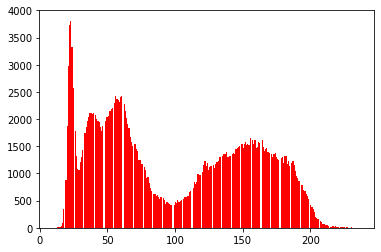

In [ ]:
flower_hist = flower_gray.ravel()
plt.hist(flower_hist, bins = 256, color = 'red')

**3-2/ l'histogramme normalisé**

(array([9.25925926e-06, 1.38888889e-05, 3.24074074e-05, 3.24074074e-05,
        6.48148148e-05, 1.75925926e-04, 4.35185185e-04, 1.64351852e-03,
        0.00000000e+00, 4.04629630e-03, 8.65277778e-03, 1.37500000e-02,
        1.72546296e-02, 1.76388889e-02, 1.54120370e-02, 1.19351852e-02,
        0.00000000e+00, 8.23148148e-03, 6.10185185e-03, 4.99074074e-03,
        4.93981481e-03, 5.62962963e-03, 6.03240741e-03, 6.63425926e-03,
        0.00000000e+00, 8.08333333e-03, 8.57407407e-03, 9.10185185e-03,
        9.43055556e-03, 9.76388889e-03, 9.74537037e-03, 9.66666667e-03,
        9.78240741e-03, 0.00000000e+00, 9.62500000e-03, 9.22685185e-03,
        9.05555556e-03, 9.01851852e-03, 8.60648148e-03, 8.24074074e-03,
        8.67129630e-03, 0.00000000e+00, 9.08796296e-03, 9.43981481e-03,
        9.45370370e-03, 9.50462963e-03, 9.96296296e-03, 1.00879630e-02,
        1.01851852e-02, 0.00000000e+00, 1.05925926e-02, 1.11990741e-02,
        1.09444444e-02, 1.08472222e-02, 1.06851852e-02, 1.116203

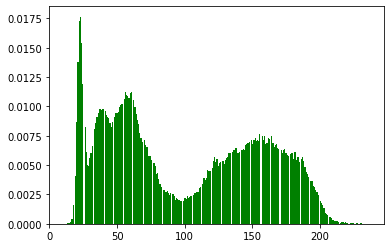

In [ ]:
 plt.hist(flower_gray.ravel(), bins = 256, density = True, color = 'green')

*Commentaire :*
- L’histogramme nous donne le nombre d’apparition de niveau de gris.
- L’histogramme normalisé nous donne la probabilité d’occurrence de
niveau de gris (la fréquence d’apparition)

**4/ l'histogramme cumulé**

(array([8.13802083e-06, 2.03450521e-05, 4.88281250e-05, 7.73111979e-05,
        1.34277344e-04, 2.88899740e-04, 6.71386719e-04, 2.11588542e-03,
        2.11588542e-03, 5.67220052e-03, 1.32771810e-02, 2.53621419e-02,
        4.05273438e-02, 5.60302734e-02, 6.95760091e-02, 8.00659180e-02,
        8.00659180e-02, 8.73006185e-02, 9.26635742e-02, 9.70499674e-02,
        1.01391602e-01, 1.06339518e-01, 1.11641439e-01, 1.17472331e-01,
        1.17472331e-01, 1.24576823e-01, 1.32112630e-01, 1.40112305e-01,
        1.48400879e-01, 1.56982422e-01, 1.65547689e-01, 1.74043783e-01,
        1.82641602e-01, 1.82641602e-01, 1.91101074e-01, 1.99210612e-01,
        2.07169596e-01, 2.15096029e-01, 2.22660319e-01, 2.29903158e-01,
        2.37524414e-01, 2.37524414e-01, 2.45511882e-01, 2.53808594e-01,
        2.62117513e-01, 2.70471191e-01, 2.79227702e-01, 2.88094076e-01,
        2.97045898e-01, 2.97045898e-01, 3.06355794e-01, 3.16198730e-01,
        3.25817871e-01, 3.35351563e-01, 3.44742839e-01, 3.545532

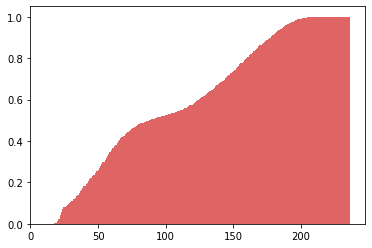

In [ ]:
plt.hist(flower_gray.ravel(), bins = 256, density = True,cumulative=True, color = '#DE6564')

*Commentaire :*

L’histogramme cumulé nous donne le taux d'apparition de tous les
niveaux de gris inférieurs à une certaine valeur.


**5/ l'égalisation d'histogramme**

In [ ]:
def image_egalisation(image):
  img = np.asarray(image)
  flat = img.ravel()
  histogram = np.zeros(256)
  for pixel in flat:
    histogram[pixel] += 1
  histogram = iter(histogram)
  b = [next(histogram)]
  for i in histogram:
    b.append(b[-1] + i)
  cs = np.array(b)
  nj = (cs - cs.min()) * 255
  N = cs.max() - cs.min()
  cs = cs.astype('uint8')
  cs = nj / N
  img_new = cs[flat]
  img_new = np.reshape(img_new, image.shape)
  return img_new
  

In [ ]:
leg_im = image_egalisation(flower_gray)

*Commentaire :*

Après avoir égaliser l'histogramme, le contraste de l'image a augmenté.

**6/**

Remarque : la method *cv.equalizeHist* ne marche pas sur Google_Collab, du coup on a utilisé la method *skimage.exposure.equalize_hist* !



In [ ]:
from skimage import exposure
equalized_image = exposure.equalize_hist(flower_gray)

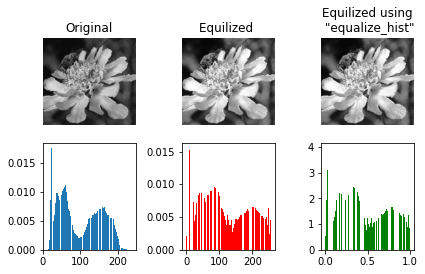

In [ ]:
fig, axis = plt.subplots(nrows = 2, ncols = 3)
axis[0,0].imshow(flower_gray, cmap = 'gray')
axis[0,1].imshow(leg_im, cmap = 'gray')
axis[0,2].imshow(equalized_image, cmap = 'gray')

axis[0,0].set_title('Original')
axis[0,1].set_title('Equilized ')
axis[0,2].set_title('Equilized using\n "equalize_hist"')

axis[1,0].hist(flower_gray.ravel(), bins = 256, density = True)
axis[1,1].hist(leg_im.ravel(), bins = 256, density = True, color = 'red') 
axis[1,2].hist(equalized_image.ravel(), bins = 256, density = True, color = 'green') 

for j in range(3):
  axis[0,j].axis('off')

plt.tight_layout()

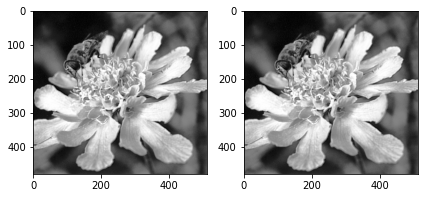

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols= 2)
ax[0].imshow(leg_im, cmap = 'gray')
ax[1].imshow(equalized_image, cmap = 'gray')

plt.tight_layout()

**7/**

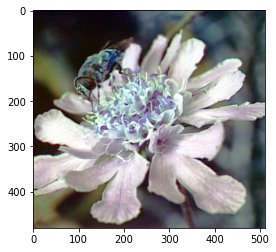

In [ ]:
from skimage.color import rgb2gray
r_fl,g_fl,b_fl  = cv.split(flower)
r_eg_fl = exposure.equalize_hist(r_fl)
g_eg_fl = exposure.equalize_hist(g_fl)
b_eg_fl = exposure.equalize_hist(b_fl)
image = cv.merge([r_eg_fl, g_eg_fl, b_eg_fl])
plt.imshow(image)


In [ ]:
import skimage.measure as skm    
entropy = skm.shannon_entropy(image)
print('l\'entropy : ', entropy)

l'entropy :  8.980169359979929


**8/**

In [ ]:
ycrcb = cv.cvtColor(flower, cv.COLOR_BGR2YCrCb)
y,cr,cb = cv.split(ycrcb)
y = exposure.equalize_hist(y)
ycrcb_egl = cv.merge([y,cr,cb])
equalized_img = cv.cvtColor(ycrcb_egl, cv.COLOR_YCrCb2BGR)
plt.imshow(equalized_image)

In [ ]:
import skimage.measure as skm    
entropy = skm.shannon_entropy(equalized_img)
print('l\'entropy de l\'image égalisé par rapport à l’histogramme cumulé: ', entropy)

**9/**

 *Commentaire et comparaison :*

on voit que l'égalisation par rapport a l’histogramme cumulé donne de meilleurs resultas que celle obtenu en égalisant chaque canal indépendamment, mais l'entropie a été diminue plus.
Ainsi avec l'égalisation par rapport a l’histogramme cumulé l’image a été améliorée le mieux,mais l’information contenue dans l’image a diminué  ce qui s'explique par l'apparition de trous dans son histogramme.

**10/**

In [ ]:
path = '/content/drive/MyDrive/images/pentagon.tif'
pentagon = cv.imread(path)
plt.imshow(pentagon)

In [ ]:
r_pen,g_pen,b_pen  = cv.split(pentagon)
r_eg_pen = exposure.equalize_hist(r)
g_eg_pen = exposure.equalize_hist(g)
b_eg_pen = exposure.equalize_hist(b)
image = cv.merge([r_eg_pen, g_eg_pen, b_eg_pen])
plt.imshow(image)

*Commentaire :*

Après l’égalisation, le contraste est plus défini et ajusté ! 

Ce qui rend l’image plus claire

**11/**

In [ ]:
from skimage.exposure import match_histograms
image = cv.imread('/content/drive/MyDrive/images/cameraman.jpg')
reference = cv.imread('/content/drive/MyDrive/images/barbara.png')
matched = match_histograms(image, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()